In [ ]:
%matplotlib inline


# Blind source separation using FastICA


An example of estimating sources from noisy data.

`ICA` is used to estimate sources given noisy measurements.
Imagine 3 instruments playing simultaneously and 3 microphones
recording the mixed signals. ICA is used to recover the sources
ie. what is played by each instrument. Importantly, PCA fails
at recovering our `instruments` since the related signals reflect
non-Gaussian processes.




Automatically created module for IPython interactive environment
[[ 0.          0.        ]
 [ 1.01293219  0.53546209]
 [ 1.02452984  0.57025506]
 ..., 
 [-1.39626438 -1.68545867]
 [-1.40741108 -1.71889876]
 [-1.41853176 -1.7522608 ]]
[ 0.22366974  0.55460416]


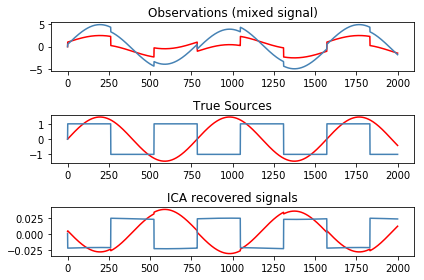

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal

S = np.c_[s1, s2]
#S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [3, 0.5]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
print(X)

scipy.io.wavfile.write("x1.wav",16000, X.T[0])
scipy.io.wavfile.write("x2.wav",16000, X.T[1])

# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
M_=ica.mean_

print(M_)


# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()